In [1]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2022-03-20 04:22:39--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  18.5MB/s    in 16s     

2022-03-20 04:22:56 (16.6 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [2]:
import zipfile

with zipfile.ZipFile('/content/GTSRB_Final_Training_Images.zip','r') as target_file:

    target_file.extractall('/content/GTSRB_Final_Training_Images/')

In [3]:
import os
from glob import glob

label_name_list = os.listdir('/content/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/')

print('total label nums = ', len(label_name_list))
print('='*50)
print(label_name_list)

total label nums =  43
['00001', '00036', '00026', '00023', '00016', '00042', '00015', '00022', '00025', '00004', '00024', '00019', '00006', '00034', '00028', '00033', '00010', '00000', '00013', '00032', '00018', '00003', '00017', '00041', '00008', '00039', '00035', '00011', '00038', '00031', '00007', '00037', '00002', '00020', '00014', '00012', '00009', '00029', '00005', '00021', '00030', '00040', '00027']


# 작업폴더 /content/GTSRB 생성

In [4]:
import os

if not os.path.exists('/content/GTSRB'):
    os.mkdir('/content/GTSRB')
    print('GTSRB dir is created !')

GTSRB dir is created !


# Shutil copy를 이용해 train 폴더에 복사본 생성

In [5]:
import shutil

src_root_dir = '/content/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'
dst_root_dir = '/content/GTSRB/train'

if os.path.exists(dst_root_dir):
    os.rmdir(dst_root_dir)
    print(dst_root_dir + 'is deleted !')

shutil.copytree(src_root_dir, dst_root_dir)


'/content/GTSRB/train'

# /content/GTSRB/test 폴더 생성 후 train 디렉토리와 동일한 이름의 디렉토리를 test 하위 디렉토리로 만든다

In [6]:
import os

label_name_list = os.listdir('/content/GTSRB/train/')


if not os.path.exists('/content/GTSRB/test/'):
    os.mkdir('/content/GTSRB/test/')
    print('/content/GTSRB/test dir is created !')
    
    count = 0

    for label_name in label_name_list:
        os.mkdir('/content/GTSRB/test/' + label_name)
        count += 1

    print('train label count => ', count)

/content/GTSRB/test dir is created !
train label count =>  43


# train 데이터에서 test 데이터를 분리하여 이동처리

In [7]:
import os
import shutil
import random
from glob import glob

ratio = 0.2

train_root_dir = '/content/GTSRB/train/'
test_root_dir = '/content/GTSRB/test/'

image_label_list = os.listdir(train_root_dir)

for label_name in image_label_list:
    
    train_image_list = glob(train_root_dir + label_name+'/*.ppm')

    print('========================================================================')
    print('total [%s] image file nums => [%s]'%(label_name, len(train_image_list)))
    
    split_num = int(ratio * len(train_image_list))

    print('split nums => ', split_num)

    test_image_list = train_image_list[0:split_num] 

    move_nums = 0

    for image_file in test_image_list:

        shutil.move(image_file, test_root_dir + label_name)
        
        move_nums += 1

    print('total move nums => ', move_nums)
    print('========================================================================')


total [00001] image file nums => [2220]
split nums =>  444
total move nums =>  444
total [00036] image file nums => [390]
split nums =>  78
total move nums =>  78
total [00026] image file nums => [600]
split nums =>  120
total move nums =>  120
total [00023] image file nums => [510]
split nums =>  102
total move nums =>  102
total [00016] image file nums => [420]
split nums =>  84
total move nums =>  84
total [00042] image file nums => [240]
split nums =>  48
total move nums =>  48
total [00015] image file nums => [630]
split nums =>  126
total move nums =>  126
total [00022] image file nums => [390]
split nums =>  78
total move nums =>  78
total [00025] image file nums => [1500]
split nums =>  300
total move nums =>  300
total [00004] image file nums => [1980]
split nums =>  396
total move nums =>  396
total [00024] image file nums => [270]
split nums =>  54
total move nums =>  54
total [00019] image file nums => [210]
split nums =>  42
total move nums =>  42
total [00006] image file 

# 검증

In [8]:
src_root_dir = '/content/GTSRB/train'
dst_root_dir = '/content/GTSRB/test'

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(dst_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
  print('error !')
else:
  print(len(train_label_name_list),len(test_label_name_list))

for label_name in train_label_name_list:

  train_data_nums = len(os.listdir(os.path.join(src_root_dir,label_name)))
  test_data_nums = len(os.listdir(os.path.join(dst_root_dir,label_name)))

  print('[%s] | train => [%s], test => [%s]'%(label_name, train_data_nums, test_data_nums))
  print('========================================================')

43 43
[00000] | train => [169], test => [42]
[00001] | train => [1777], test => [444]
[00002] | train => [1801], test => [450]
[00003] | train => [1129], test => [282]
[00004] | train => [1585], test => [396]
[00005] | train => [1489], test => [372]
[00006] | train => [337], test => [84]
[00007] | train => [1153], test => [288]
[00008] | train => [1129], test => [282]
[00009] | train => [1177], test => [294]
[00010] | train => [1609], test => [402]
[00011] | train => [1057], test => [264]
[00012] | train => [1681], test => [420]
[00013] | train => [1729], test => [432]
[00014] | train => [625], test => [156]
[00015] | train => [505], test => [126]
[00016] | train => [337], test => [84]
[00017] | train => [889], test => [222]
[00018] | train => [961], test => [240]
[00019] | train => [169], test => [42]
[00020] | train => [289], test => [72]
[00021] | train => [265], test => [66]
[00022] | train => [313], test => [78]
[00023] | train => [409], test => [102]
[00024] | train => [217], tes

# Train 디렉토리에서 iamge, label로 numpy 생성

In [9]:
import cv2
import numpy as np

train_image_list = []
train_label_list = []

train_base_dir = '/content/GTSRB/train/'
train_label_name_list = os.listdir(train_base_dir)

for train_label_name in train_label_name_list:
    file_path = os.path.join(train_base_dir, train_label_name)

    train_img_file_list = glob(file_path + '/*.ppm')

    for train_img_file in train_img_file_list:
        src_img = cv2.imread(train_img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(32,32))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)   

        if src_img is None:
            continue
        train_image_list.append(src_img)
        train_label_list.append(float(train_label_name))

x_train = np.array(train_image_list).astype('float32')
y_train = np.array(train_label_list).astype('float32')

print('x_train.shape = {}, y_train.shape = {}'.format(x_train.shape, y_train.shape))

x_train.shape = (31368, 32, 32, 3), y_train.shape = (31368,)


# Test 디렉토리에서 iamge, label로 numpy 생성

In [10]:
import cv2
import numpy as np

test_image_list = []
test_label_list = []

test_base_dir = '/content/GTSRB/test/'
test_label_name_list = os.listdir(test_base_dir)

for test_label_name in test_label_name_list:
    file_path = os.path.join(test_base_dir, test_label_name)

    test_img_file_list = glob(file_path + '/*.ppm')

    for test_img_file in test_img_file_list:
        src_img = cv2.imread(test_img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(32,32))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)   

        if src_img is None:
            continue
        test_image_list.append(src_img)
        test_label_list.append(float(test_label_name))

x_test = np.array(test_image_list).astype('float32')
y_test = np.array(test_label_list).astype('float32')

print('x_test.shape = {}, y_test.shape = {}'.format(x_test.shape, y_test.shape))

x_test.shape = (7841, 32, 32, 3), y_test.shape = (7841,)


# 정규화

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0


# Sample 이미지 출력

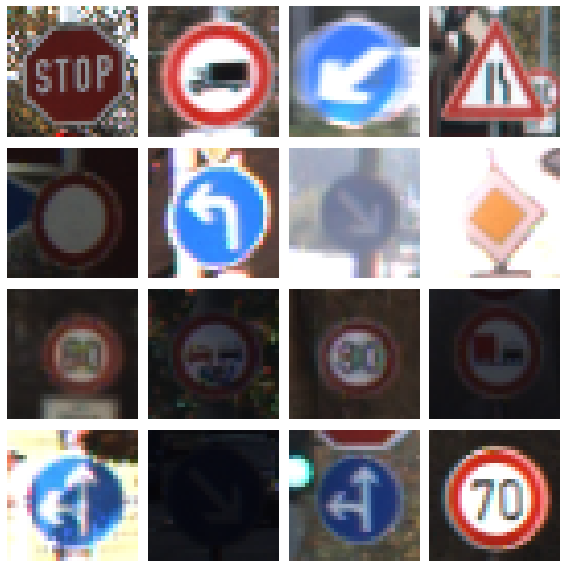

In [12]:
import matplotlib.pyplot as plt

random_index = np.random.randint(0,len(x_train),16)

plt.figure(figsize=(8,8))
for pos in range(len(random_index)):
    plt.subplot(4,4,pos+1)
    plt.axis('off')
    train_img_index = random_index[pos]
    plt.imshow(x_train[train_img_index])

plt.tight_layout()
plt.show()

# 모델링

In [13]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet

In [14]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(32,32,3))
mobilenet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32) 

In [15]:
def make_model(learning_rate=1e-3):
    n_classes = len(os.listdir('/content/GTSRB/train/'))

    model = Sequential()

    model.add(mobilenet)

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes,activation='softmax'))

    return model

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5)

hist_list = []
accuracy_list = []
learning_rate_list = [1e-2, 1e-3, 1e-4, 2e-5]

for i in range(len(learning_rate_list)):

    start_time = datetime.now()

    model = make_model(learning_rate_list[i])

    model.compile(optimizer=Adam(learning_rate=i), 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
    hist = model.fit(x_train,y_train, 
                    epochs=130, batch_size=32, 
                    validation_data=(x_test,y_test),
                    callbacks=earlystopping)
    
    end_time = datetime.now()
    
    accuracy_list.append(model.evaluate(x_test,y_test)[1])

    print('===========================================================')
    print('    lr [%s] Accuracy => [%s]'% (learning_rate_list[i], accuracy_list[i]) )
    print('    Elapsed Time => ', end_time-start_time)
    print('===========================================================')
    
    hist_list.append(hist)

Epoch 1/130
981/981 [==============================] - 28s 16ms/step - loss: 6.9646 - accuracy: 0.0229 - val_loss: 5.3547 - val_accuracy: 0.0275
Epoch 2/130
981/981 [==============================] - 14s 14ms/step - loss: 6.9506 - accuracy: 0.0238 - val_loss: 5.3666 - val_accuracy: 0.0272
Epoch 3/130
981/981 [==============================] - 14s 14ms/step - loss: 6.9476 - accuracy: 0.0231 - val_loss: 5.3769 - val_accuracy: 0.0261
Epoch 4/130
981/981 [==============================] - 13s 13ms/step - loss: 6.9450 - accuracy: 0.0227 - val_loss: 5.3812 - val_accuracy: 0.0277
Epoch 5/130
981/981 [==============================] - 13s 13ms/step - loss: 6.9848 - accuracy: 0.0232 - val_loss: 5.3675 - val_accuracy: 0.0283
Epoch 6/130
246/246 [==============================] - 2s 6ms/step - loss: 5.3699 - accuracy: 0.0270
    lr [0.01] Accuracy => [0.0270373672246933]
    Elapsed Time =>  0:01:34.308034
Epoch 1/130
981/981 [==============================] - 15s 13ms/step - loss: 17.7506 - accu

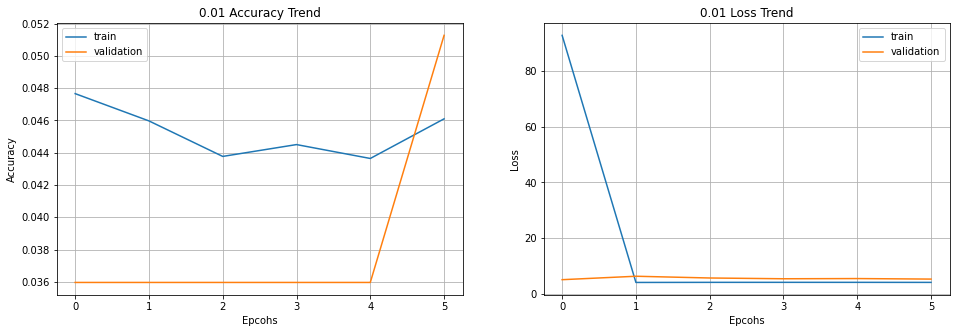

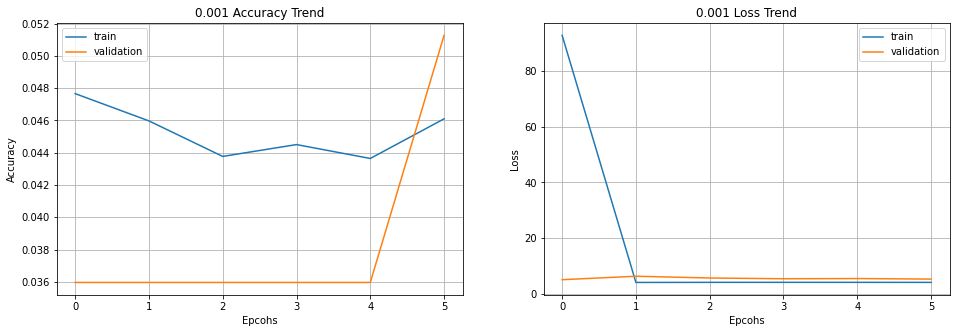

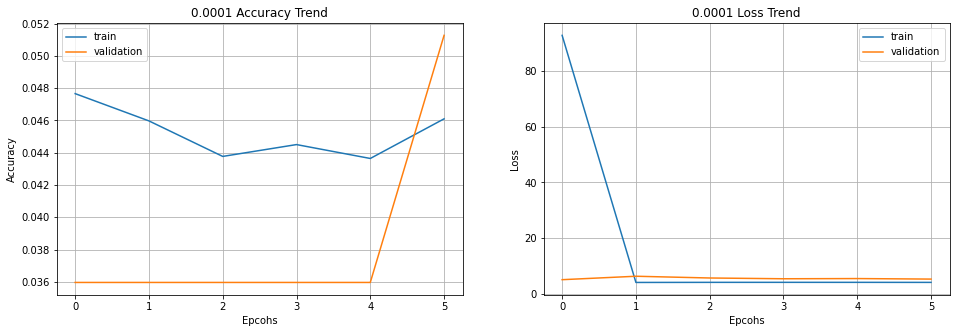

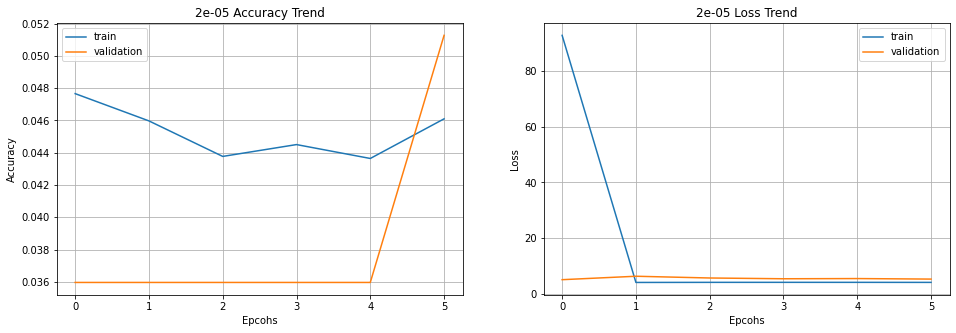

In [17]:
for i in range(len(hist_list)):
    plt.figure(figsize=(16,5))

    plt.subplot(1,2,1)
    plt.title(str(learning_rate_list[i])+' Accuracy Trend')
    plt.grid()
    plt.xlabel('Epcohs')
    plt.ylabel('Accuracy')
    plt.plot(hist.history['accuracy'],label='train')
    plt.plot(hist.history['val_accuracy'],label='validation')
    plt.legend(loc='best')

    plt.subplot(1,2,2)
    plt.title(str(learning_rate_list[i])+' Loss Trend')
    plt.grid()
    plt.xlabel('Epcohs')
    plt.ylabel('Loss')
    plt.plot(hist.history['loss'],label='train')
    plt.plot(hist.history['val_loss'],label='validation')
    plt.legend(loc='best')
    plt.show()